## Binomial model

We load all the packages we need to use in the notebook

In [1]:

#We load the package with the Binomial distribution
#We will obtain the Binomial coefficients
import scipy.special

#The numerical package
import numpy as np

#Package to do Plots
import matplotlib.pyplot as plt 

We know that the number of times a scenario is reached is given by the coefficient of the Binomial.
We will compare how many times we reach each scenario with 5 time steps and 30 time steps

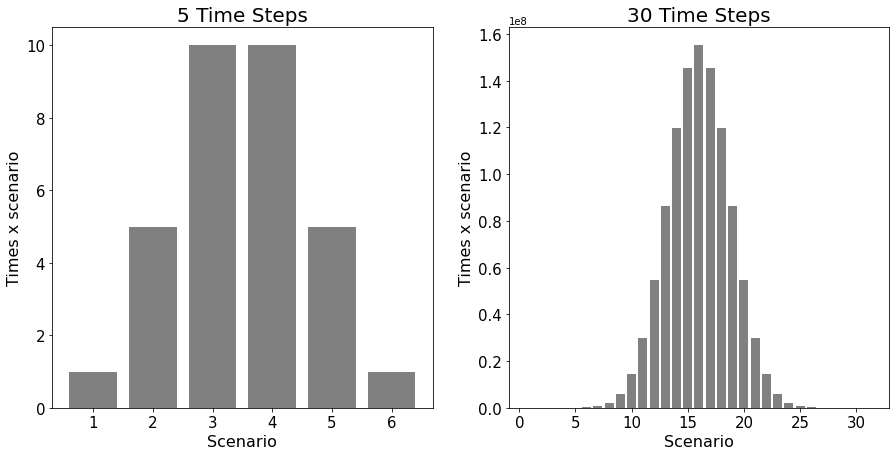

In [4]:

#We create a function to calculate the Binomial coefficients
def coefbin(n):
    vector=np.zeros(n+1)
    for i in range(0,n+1):
        vector[i]=scipy.special.binom(n,i)
    
    return vector

#We plot the results for a Binomial with 5 time steps
# and 30 time steps

#We create the figure
fig = plt.figure(figsize =(15 ,7) )

#The first plot
plt.subplot(1,2,1)

#We write the Title for the Plot
plt.title('5 Time Steps', fontsize=20) 

#We write the x-axis label
plt.xlabel('Scenario', fontsize=16)

#We write the y-axis label
plt.ylabel('Times x scenario', fontsize=16) 

#We define the size of the x-axis
plt.yticks(fontsize=15,)

#We define the size of the y-axis
plt.xticks(fontsize=15,)

#We plot the results
plt.bar(np.linspace(1,6,6),coefbin(5), color='Gray')

#The second plot
plt.subplot(1,2,2)

 #We write the Title for the Plot
plt.title('30 Time Steps', fontsize=20)

#We write the x-axis label
plt.xlabel('Scenario', fontsize=16)

#We write the y-axis label
plt.ylabel('Times x scenario', fontsize=16)

#We define the size of the y-axis
plt.yticks(fontsize=15,)

#We define the size of the x-axis
plt.xticks(fontsize=15,)

#We plot the results
plt.bar(np.linspace(1,31,31),coefbin(30), color='Gray')

plt.savefig('C:/Users/ra_me/Dropbox/Doc/17- Book - Introduction to Financial Mathematics/gfx/5-BinomialModel/Paths.eps', format='eps', bbox_inches = 'tight')


plt.show()

## The Binomial Model

We create a function to calculate: u, d and p

In [66]:
#We upload the maths library
import numpy as np

def get_updown_probabilities(r,sigma,T,n):
#This function calculate the up, down ratio
#and the risk-neutral probability

#Inputs: 
#r: risk-free rate
#sigma: volatility
#T: Maturity time
#n: number of steps
 

    # We calculate the time step size
    dt=T/n

    #We apply the u and d formulation
    u=np.exp(sigma*np.sqrt(dt))
    d=1/u

    #Then, we calculate the risk-neutral probability
    p=(np.exp(r*dt) -d)/(u-d)

    return (u,d,p)

In [67]:
get_updown_probabilities(0.05,0.20,1,2)

(1.151909910168909, 0.8681234453945849, 0.5539082889483392)

We want to encapsulate the tree in a matrix
We start working from the most basic example. Fill the whole matrix

In [68]:
#Algorithm to move through all positions of a matrix

#We upload the maths library
import numpy as np

#We create a Matrix with 4 positions
Matrix=np.zeros((4,4))

#We create a variable to number all the matrix positions
count=1

#For each column
for j in range(0,4):
    #For each row
    for i in range(0,4):
        Matrix[i,j]=count
        count=count+1

#Print Matrix
Matrix

array([[ 1.,  5.,  9., 13.],
       [ 2.,  6., 10., 14.],
       [ 3.,  7., 11., 15.],
       [ 4.,  8., 12., 16.]])

Note that when encapsulating the Binomial model in a matrix, we only need to fill the upper-diagonal side

In [69]:
#Algorithm to move through all positions of a matrix

#We upload the maths library
import numpy as np

#We create a Matrix with 4 positions
Matrix=np.zeros((4,4))

#We create a variable to number all the matrix positions
count=1

#For each column
for j in range(0,4):
    #For each row
    for i in range(0,4):
        #We add a condition to move only in the upper-diagonal matrix
        if j>=i:
            Matrix[i,j]=count
            count=count+1

#Print Matrix
Matrix

array([[ 1.,  2.,  4.,  7.],
       [ 0.,  3.,  5.,  8.],
       [ 0.,  0.,  6.,  9.],
       [ 0.,  0.,  0., 10.]])

But we can do it in a more elegant way, imposing the condition on the second for clause

In [70]:
#Algorithm to move through all positions of a matrix

#We upload the maths library
import numpy as np

#We create a Matrix with 4 positions
Matrix=np.zeros((4,4))

#We create a variable to number all the matrix positions
count=1

#For each column
for j in range(0,4):
    #For each row
    for i in range(0,j+1):
            Matrix[i,j]=count
            count=count+1

#Print Matrix
Matrix

array([[ 1.,  2.,  4.,  7.],
       [ 0.,  3.,  5.,  8.],
       [ 0.,  0.,  6.,  9.],
       [ 0.,  0.,  0., 10.]])

We will create a function to populate the tree asset prices

In [72]:
#Function to obtain prices on a Binomial model

#We upload the maths library
import numpy as np

def get_prices(S,r,sigma,T,n):
#This function calculate the up, down ratio
#and the risk-neutral probability

#Inputs: 
#r: risk-free rate
#sigma: volatility
#T: Maturity time
#n: number of steps
 

    # We calculate the time step size
    dt=T/n

    #We apply the u and d formulation
    u=np.exp(sigma*np.sqrt(dt))
    d=1/u

    #Then, we calculate the risk-neutral probability
    p=(np.exp(r*dt) -d)/(u-d)
    
    #We create a matrix to store the prices
    Stree=np.zeros((n+1, n+1))
    
    #For each time step
    for j in range(0,n+1):
        #For each path
        for i in range(0, j+1):
            #The nodes are powers of u and d
            Stree[i,j] = S*(u**(j-i))*(d**(i));

    
    return (u,d,p,Stree)

In [74]:
get_prices(100,0.05,0.2,1,3)

(1.1224009024456676,
 0.8909472522884107,
 0.5437765963610321,
 array([[100.        , 112.24009024, 125.97837858, 141.39824581],
        [  0.        ,  89.09472523, 100.        , 112.24009024],
        [  0.        ,   0.        ,  79.37870064,  89.09472523],
        [  0.        ,   0.        ,   0.        ,  70.72223522]]))

Now, we will include the intrinsic value.
The intrinsic value depends on the option type.
We have to code the call option case and the put option one.

In [75]:
#Function to obtain prices on a Binomial model
#As well as the Intrinsic option values

#We upload the maths library
import numpy as np

def get_prices_and_intrinsic(S,K,r,sigma,T,n,otype):
#This function calculate the up, down ratio
#and the risk-neutral probability

#Inputs: 
#r: risk-free rate
#sigma: volatility
#T: Maturity time
#n: number of steps
 

    # We calculate the time step size
    dt=T/n

    #We apply the u and d formulation
    u=np.exp(sigma*np.sqrt(dt))
    d=1/u

    #Then, we calculate the risk-neutral probability
    p=(np.exp(r*dt) -d)/(u-d)
    
    #We create a matrix to store the prices
    Stree=np.zeros((n+1, n+1))
    
    #We create a matrix to store the intrinic value
    Intrinsic=np.zeros((n+1, n+1))
    
    #For each time step
    for j in range(0,n+1):
        #For each path
        for i in range(0,j+1):
            #The nodes are powers of u and d
            Stree[i,j] = S*(u**(j-i))*(d**(i))
            
            #Depending if is a call or a put
            #we apply a different payoff function
            if otype=="call":
                Intrinsic[i,j]=np.maximum(Stree[i,j]-K,0)
            elif otype=="put":
                Intrinsic[i,j]=np.maximum(K-Stree[i,j],0)
            else:
                print("Wrong option type. Please write call or put")
    
    return (u,d,p,Stree, Intrinsic)

In [78]:
get_prices_and_intrinsic(100,100,0.05,0.2,1,3, 'call')

(1.1224009024456676,
 0.8909472522884107,
 0.5437765963610321,
 array([[100.        , 112.24009024, 125.97837858, 141.39824581],
        [  0.        ,  89.09472523, 100.        , 112.24009024],
        [  0.        ,   0.        ,  79.37870064,  89.09472523],
        [  0.        ,   0.        ,   0.        ,  70.72223522]]),
 array([[ 0.        , 12.24009024, 25.97837858, 41.39824581],
        [ 0.        ,  0.        ,  0.        , 12.24009024],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]]))

We have to learn how to go backwards to calculate the option price.
We start playing with a matrix to learn how it works

In [82]:
#Algorithm to move through all positions of a matrix

#We upload the maths library
import numpy as np

#We create a Matrix with 4 positions
Matrix=np.zeros((4,4))

#We create a variable to number all the matrix positions
count=1

for j in range(3,0,-1):
    for i in range(0,j+1):
            Matrix[i,j]=count
            count=count+1

#Print Matrix
Matrix

array([[0., 8., 5., 1.],
       [0., 9., 6., 2.],
       [0., 0., 7., 3.],
       [0., 0., 0., 4.]])

My first code for finding option values

In [83]:
#Function to obtain prices on a Binomial model
#As well as the Intrinsic option values

#We upload the maths library
import numpy as np

def EuBinomial(S,K,r,sigma,T,n,otype):
#This function calculate the up, down ratio
#and the risk-neutral probability

#Inputs: 
#r: risk-free rate
#sigma: volatility
#T: Maturity time
#n: number of steps
 

    # We calculate the time step size
    dt=T/n

    #We apply the u and d formulation
    u=np.exp(sigma*np.sqrt(dt))
    d=1/u

    #Then, we calculate the risk-neutral probability
    p=(np.exp(r*dt) -d)/(u-d)
    
    #We create a matrix to store the prices
    Stree=np.zeros((n+1, n+1))
    
    #We create a matrix to store the intrinic value
    Intrinsic=np.zeros((n+1, n+1))
    
    #We create a matrix to store the option value
    Option=np.zeros((n+1, n+1))
    
    #For each path
    for j in range(0,n+1):
        #For each time step
        for i in range(0,j+1):
            #The nodes are powers of u and d
            Stree[i,j] = S*(u**(j-i))*(d**(i))
            
            #Depending if is a call or a put
            #we apply a different payoff function
            if otype=="call":
                Intrinsic[i,j]=np.maximum(Stree[i,j]-K,0)
            elif otype=="put":
                Intrinsic[i,j]=np.maximum(K-Stree[i,j],0)
            else:
                print("Wrong option type. Please write call or put")
            
      
    #For each path
    for j in range(n,-1,-1):
        #For each time step
         for i in range(0, j+1):
            if j==n:
                Option[i,j] = Intrinsic[i,j]
            else:
                Option[i,j] = np.exp(-r*dt)*(Option[i,j+1]*p\
                                             + Option[i+1,j+1]*(1-p))  
    
    print("The Option price is", Option [0,0])
            
    
    return (u,d,p,Stree, Intrinsic, Option)

In [85]:
S=5
K=8
r=0.02
sigma=0.20
T=2
n=2
otype="put"
EuBinomial(S,K,r,sigma,T,n,otype)

The Option price is 2.686315513218586


(1.2214027581601699,
 0.8187307530779818,
 0.5003342283694454,
 array([[5.        , 6.10701379, 7.45912349],
        [0.        , 4.09365377, 5.        ],
        [0.        , 0.        , 3.35160023]]),
 array([[3.        , 1.89298621, 0.54087651],
        [0.        , 3.90634623, 3.        ],
        [0.        , 0.        , 4.64839977]]),
 array([[2.68631551, 1.7345756 , 0.54087651],
        [0.        , 3.74793562, 3.        ],
        [0.        , 0.        , 4.64839977]]))

We add the American style in our code

In [86]:
#Function to obtain prices on a Binomial model
#As well as the Intrinsic option values

#We upload the maths library
import numpy as np

def Binomial(S,K,r,sigma,T,n,otype, EuOrAm):
#This function calculate the up, down ratio
#and the risk-neutral probability

#Inputs: 
#r: risk-free rate
#sigma: volatility
#T: Maturity time
#n: number of steps
    # We calculate the time step size
    dt=T/n

    #We apply the u and d formulation
    u=np.exp(sigma*np.sqrt(dt))
    d=1/u

    #Then, we calculate the risk-neutral probability
    p=(np.exp(r*dt) -d)/(u-d)
    
    #We create a matrix to store the prices
    Stree=np.zeros((n+1, n+1))
    
    #We create a matrix to store the intrinic value
    Intrinsic=np.zeros((n+1, n+1))
    
    #We create a matrix to store the option value
    Option=np.zeros((n+1, n+1))
    
    #For each path
    for j in range(0,n+1):
        #For each time step
        for i in range(0,j+1):
            #The nodes are powers of u and d
            Stree[i,j] = S*(u**(j-i))*(d**(i))
            
            #Depending if is a call or a put
            #we apply a different payoff function
            if otype=="call":
                Intrinsic[i,j]=np.maximum(Stree[i,j]-K,0)
            elif otype=="put":
                Intrinsic[i,j]=np.maximum(K-Stree[i,j],0)
            else:
                print("Wrong option type. Please write call or put")
            
      
    #For each path
    for j in range(n,-1,-1):
        #For each time step
         for i in range(0, j+1):
            if j==n:
                Option[i,j] = Intrinsic[i,j]
            else:
                Option[i,j] = np.exp(-r*dt)*(Option[i,j+1]*p\
                                             + Option[i+1,j+1]*(1-p))
                
                #If it is American, we compare the option at the node
                #with its intrinsic value.
                #Choosing the maximum.
                if EuOrAm=="American":
                    Option[i,j]=np.maximum(Intrinsic[i,j],Option[i,j])
    
    print("The Option price is", Option [0,0])
            
    
    return (u,d,p,Stree, Intrinsic, Option)

In [87]:
S=5
K=8
r=0.02
sigma=0.20
T=2
n=2
otype="put"
Binomial(S,K,r,sigma,T,n,otype, "American")

The Option price is 3.0


(1.2214027581601699,
 0.8187307530779818,
 0.5003342283694454,
 array([[5.        , 6.10701379, 7.45912349],
        [0.        , 4.09365377, 5.        ],
        [0.        , 0.        , 3.35160023]]),
 array([[3.        , 1.89298621, 0.54087651],
        [0.        , 3.90634623, 3.        ],
        [0.        , 0.        , 4.64839977]]),
 array([[3.        , 1.89298621, 0.54087651],
        [0.        , 3.90634623, 3.        ],
        [0.        , 0.        , 4.64839977]]))